## CSV 1 - CONSUMO DE ENERGIA


### VARIÁVEIS CATEGÓRICAS

DATA; ENERGIA ELÉTRICA EM GWh

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from dateutil.parser import parse

sns.set_context('notebook')
sns.set_style('darkgrid')


In [3]:
data = 'ipeadata_consumo_energia.csv'

df = pd.read_csv(data, sep=';', skiprows=0)

data_dia = pd.Series(df['Data'])

consumo = pd.Series(df['Energia elétrica - consumo - residência - quantidade - GWh - Eletrobras - ELETRO12_CEERES12'])

df = pd.DataFrame({'Data': data_dia, 'Consumo': consumo})

In [4]:
# Transformando os dados da coluna "Data" em string

df["Data"] = df["Data"].astype('str')


In [5]:
# Criando 2 colunas

df[['Ano', 'Mes']] = df['Data'].str.split('.', expand=True)


In [6]:
df['AnoMes'] = pd.to_datetime(df['Ano'] + df['Mes'], format='%Y%m')
df['AnoMes'] = df['AnoMes'].astype('object')
df.drop('Data', axis=1, inplace=True)
df["Consumo"] = df["Consumo"].astype(str)
df['Consumo'] = df['Consumo'].str.replace(',', '.').astype(float)
df['Ano'] = pd.to_numeric(df['Ano'])
df['Mes'] = pd.to_numeric(df['Mes'])

In [7]:
print(df["Consumo"].mean())

6302.118425760286


Text(0.5, 1.0, 'Gráfico de dispersão do Consumo em função do tempo')

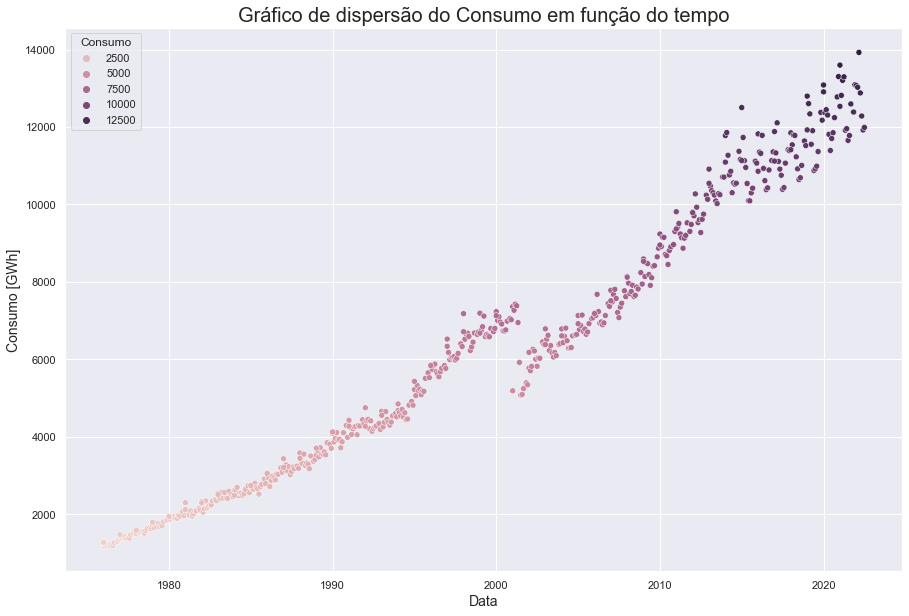

In [8]:

plt.figure(figsize=(15,10))
sns.scatterplot(x='AnoMes', y='Consumo', data=df, hue='Consumo', sizes=(20, 200))
plt.xlabel('Data', size = 14)
plt.ylabel('Consumo [GWh]', size = 14)
plt.title('Gráfico de dispersão do Consumo em função do tempo', size = 20)

In [9]:
valor_min = df["Consumo"].describe()[3]
valor_max = df["Consumo"].describe()[7]
print(f"O valor mínimo e máximo são: {valor_min} GWh e {valor_max} GWh")

O valor mínimo e máximo são: 1161.6 GWh e 13926.0 GWh


### Observações sobre o gráfico acima:
> - Atipicidade no gráfico: Há 20 anos, ocorreu um racionamento de energia na maior parte do país, com a redução compulsória de 20% do consumo de eletricidade.<br>
    Analisando o gráfico, por volta dos anos 2000, o eixo y tinha o valor aproximado de 7500 GWh, e com a redução do consumo de energia em aproximadamente 20%, há um gap no nosso gráfico, cujo valor cai para 6000 GWh aproximadamente.<br>
    
> - Os componentes da série temporal são: eixo Y - Consumo em GWh e o eixo X - Data. <br>

> - Os valores mínimo e máximo são, respectivamente: 1161.6 GWh e 13926.0 GWh.

Text(0, 0.5, 'Frequência')

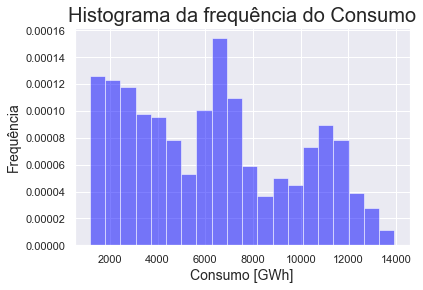

In [10]:
df['Consumo'].plot(kind='hist', bins=20, density=True, alpha=0.5, color='blue')
plt.title('Histograma da frequência do Consumo', size = 20)
plt.xlabel('Consumo [GWh]', size = 14)
plt.ylabel('Frequência', size = 14)


Text(0, 0.5, 'Consumo [GWh]')

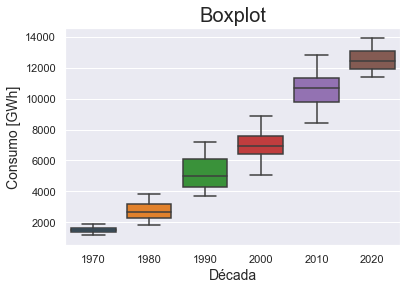

In [11]:
sns.boxplot(x=df['Ano']//10 * 10, y='Consumo', data=df);

x=df['Ano']//10 * 10
plt.title('Boxplot', size = 20)
plt.xlabel('Década', size = 14)
plt.ylabel('Consumo [GWh]', size = 14)


## Sazonalidade, decomposição e resíduos

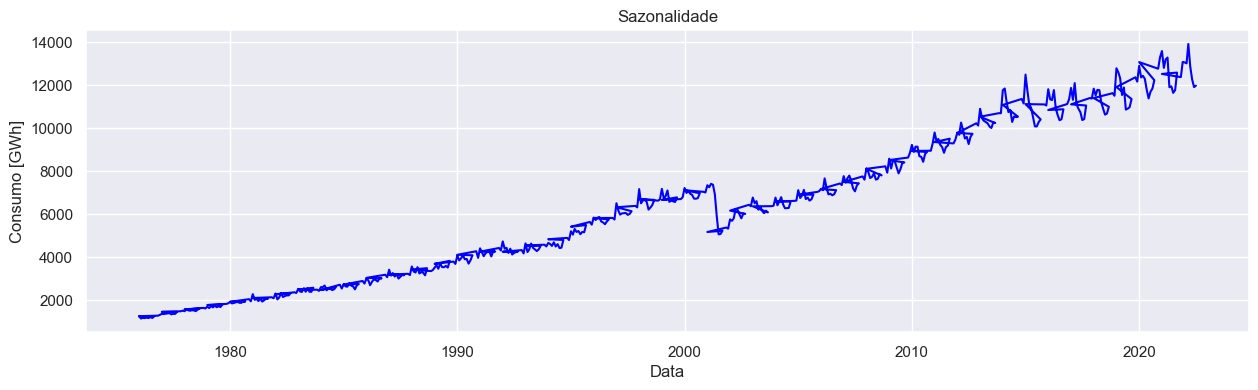

In [12]:
def plot_df(df, x, y, title="", xlabel='Data', ylabel='Consumo [GWh]', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
x = df['AnoMes'].values
y1 = df['Consumo']
plot_df(df, x = x, y= y1, title='Sazonalidade')

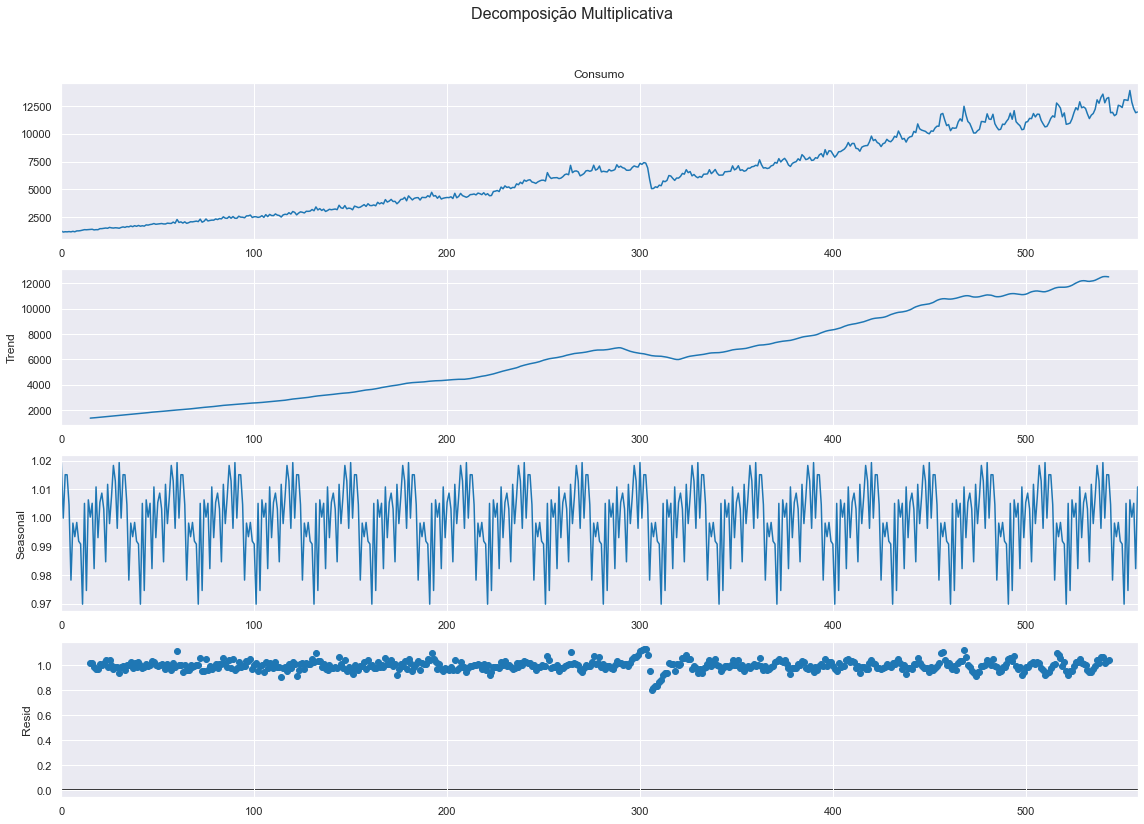

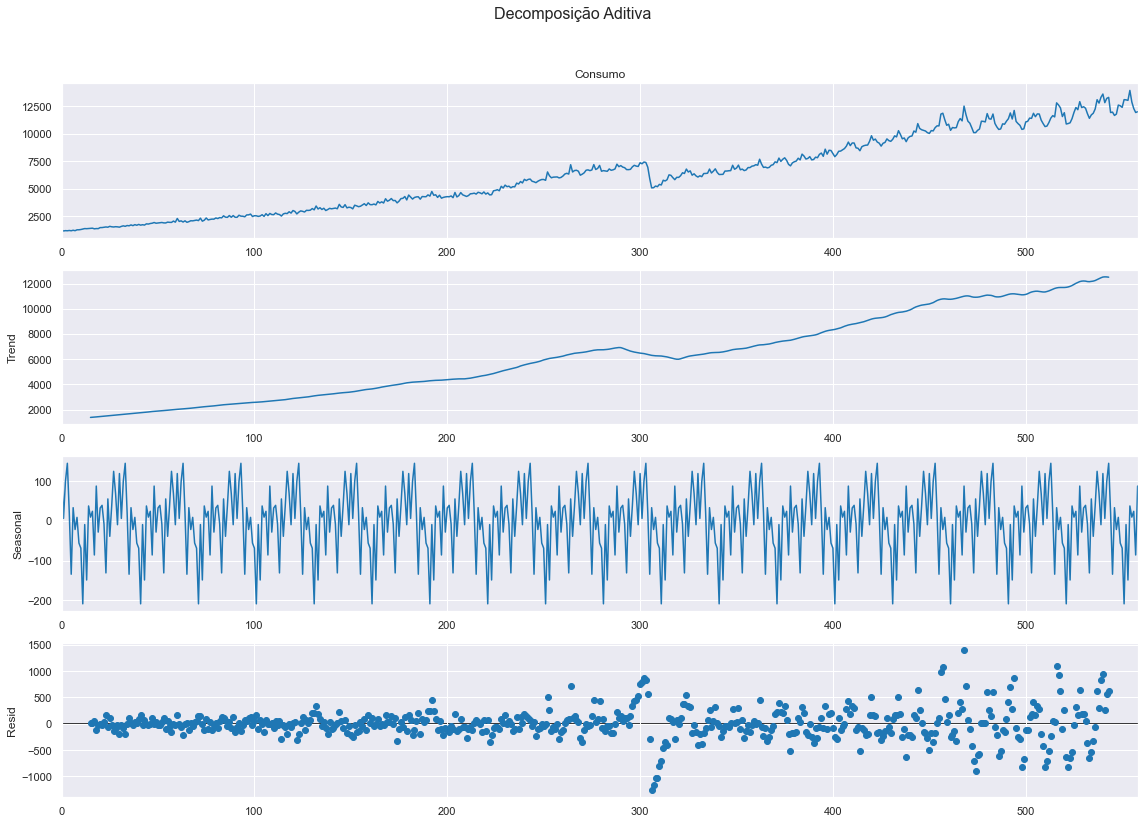

In [13]:
multiplicative_decomposition = seasonal_decompose(df['Consumo'], model='multiplicative', period=30)
additive_decomposition = seasonal_decompose(df['Consumo'], model='additive', period=30)
plt.rcParams.update({'figure.figsize': (16,12)})

multiplicative_decomposition.plot().suptitle('Decomposição Multiplicativa', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Decomposição Aditiva', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Aqui, podemos observar que, ao analisarmos através do método multiplicativo, há um certo padrão nos resíduos mais definido do que no aditivo. No aditivo, os resíduos estão distribuidos de forma mais aleatória, o que faz essa decomposição ser a mais adequada. Podemos ainda observar que não há um comportamento normal nos resíduos.